<a href="https://colab.research.google.com/github/laviniaflorentina/neural_networks_dissertation/blob/master/experiment1_baseline_convolution_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Augmentation NN

https://machinelearningmastery.com/how-to-improve-deep-learning-model-robustness-by-adding-noise/

https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

http://faroit.com/keras-docs/1.2.0/backend/




### Baseline Model with Multi-Layer Perceptrons Augmentation

NN - neural networks



Multi-Layer Perceptrons - forma primitiva de NN (putini neuroni si putine layere de neuroni)

Perceptron - 1 neuron / 1 node 

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


def scale_data(images, labels, number_classes=100):
  
  scaled_images = images.reshape(images.shape[0], 1, images.shape[1], images.shape[2]).astype('float32')
  
  # normalize inputs from 0-255 to 0-1
  # importantfor NN - learn faster
  scaled_images = scaled_images / 255

  # one hot encode outputs
  scaled_labels = np_utils.to_categorical(labels, num_classes=number_classes)
  return scaled_images, scaled_labels

Using TensorFlow backend.


In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# split test in validation + test
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.2, random_state=seed)

print("Train\t\t", X_train.shape, y_train.shape)
print("Validation\t", X_validation.shape, y_validation.shape)
print("Test\t\t", X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
Train		 (60000, 28, 28) (60000,)
Validation	 (2000, 28, 28) (2000,)
Test		 (8000, 28, 28) (8000,)


5


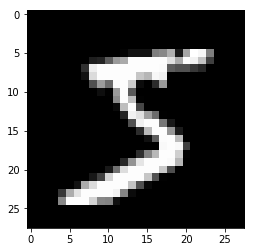

In [0]:
# show sample
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
print(y_train[0])

In [0]:
X_train, y_train = scale_data(images=X_train, labels=y_train)
X_validation, y_validation = scale_data(images=X_validation, labels=y_validation)
X_test, _ = scale_data(images=X_test, labels=y_test)

In [0]:
print("Train\t\t", X_train.shape, y_train.shape)
print("Validation\t", X_validation.shape, y_validation.shape)
print("Test\t\t", X_test.shape, y_test.shape)

Train		 (60000, 1, 28, 28) (60000, 100)
Validation	 (2000, 1, 28, 28) (2000, 100)
Test		 (8000, 1, 28, 28) (8000,)


In [0]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=X_train.shape[1:], activation='relu'))      # NOTA !!!! CONVOLUTION
model.add(MaxPooling2D(pool_size=(2, 2)))     # LAYER DE MICSORARE (IA PIXELUL CU VALOARE MAXIMA)
model.add(Dropout(0.2)) #seteaza valori pe zero random din matrici
model.add(Flatten()) # face orice dimensiune intr-un vector
model.add(Dense(128, activation='relu')) # NN normal layer
model.add(Dense(y_train.shape[-1], activation='softmax')) # NN normal layer
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

W0825 03:30:16.671690 140181477619584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 03:30:16.703701 140181477619584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 03:30:16.709131 140181477619584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 03:30:16.720683 140181477619584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0825 03:30:16.723102 1401814776

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12900     
Total params: 603,684
Trainable params: 603,684
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=20, batch_size=200, verbose=1)

W0825 03:30:19.347437 140181477619584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 2000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.3368 - acc: 0.9086 - val_loss: 0.1044 - val_acc: 0.9725
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0904 - acc: 0.9735 - val_loss: 0.0583 - val_acc: 0.9825
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0647 - acc: 0.9807 - val_loss: 0.0519 - val_acc: 0.9835
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0531 - val_acc: 0.9850
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0430 - acc: 0.9864 - val_loss: 0.0470 - val_acc: 0.9830
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0361 - acc: 0.9888 - val_loss: 0.0395 - val_acc: 0.9870
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0321 - acc: 0.9898 - val_loss: 0.0441 - val_acc:

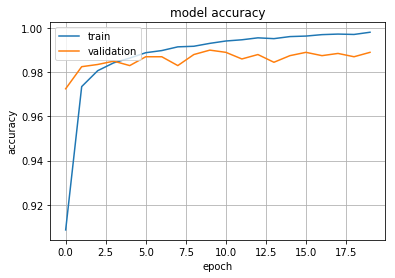

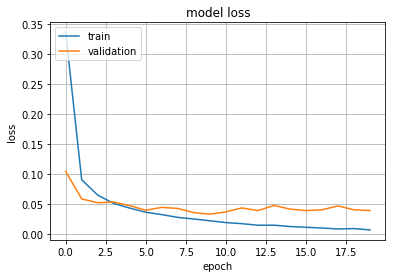

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
y_predicted = model.predict_classes(X_test)
y_predicted = np.array([number%10 for number in y_predicted])
accuracy = accuracy_score(y_test, y_predicted)

print("Accuracy ",accuracy)

Accuracy  0.991375
